In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

ĐỌC DỮ LIỆU TỪ FILE CSV

In [2]:
Data_inland = pd.read_csv('Datasets/housing_inland.csv')
Data_near_ocean = pd.read_csv('Datasets/housing_near_ocean.csv')

VẤN ĐỀ 03: 

- Xây dựng khoảng tin cậy cho $P$ 

- Kiểm dịnh giá thuyết:

    + Với giá nhà: kiểm định rằng " Tỷ lệ giá nhà > 310000$ là 50%" 
    + Với thu nhập: kiểm định rằng " Tỷ lệ thu nhập > 3000$ là 60%"

Đầu tiên ta sẽ xây dựng khoảng tin cậy cho $P$

Ở đây, tôi sẽ xây dựng khoảng tin cậy 95%

-> $\alpha$ = 0.05 -> $Z_{\alpha/2}$ $\approx$ $1.95996$

In [3]:
CI_level = 0.95
alpha = 1 - CI_level
Z_alpha2 = norm.ppf(1-alpha/2,0,1)

Tiếp theo ta sẽ tính:
+ $\hat{P}$ của giá nhà lớn hơn 310000 của những căn nhà trong đất liền
+ $\hat{P}$ của thu nhập lớn hơn 3000 của những chủ nhà trong đất liền

In [4]:
x=Data_inland[Data_inland['median_house_value']>310000].shape[0]
n=Data_inland['median_house_value'].shape[0]

p_hat_house_value = x/n

In [5]:
x=Data_inland[Data_inland['median_income']*1000>3000].shape[0]
n=Data_inland['median_income'].shape[0]

p_hat_income = x/n

In [6]:
SE_house_value = math.sqrt((p_hat_house_value * (1-p_hat_house_value))/n)

lower_inland_house_value_CI = p_hat_house_value - Z_alpha2*SE_house_value
upper_inland_house_value_CI = p_hat_house_value + Z_alpha2*SE_house_value

print(f"Khoảng tin cậy cho xác suất có giá nhà > 310000$ là ({lower_inland_house_value_CI:.3f},{upper_inland_house_value_CI:.3f})")

Khoảng tin cậy cho xác suất có giá nhà > 310000$ là (0.024,0.032)


In [7]:
SE_income = math.sqrt((p_hat_income * (1-p_hat_income))/n)

lower_inland_income_CI = p_hat_income - Z_alpha2*SE_income
upper_inland_income_CI = p_hat_income + Z_alpha2*SE_income

print(f"Khoảng tin cậy cho xác suất cho thu nhập > 3000$ là ({lower_inland_income_CI:.3f},{upper_inland_income_CI:.3f})")

Khoảng tin cậy cho xác suất cho thu nhập > 3000$ là (0.483,0.507)


Trực quan hóa khoảng tin cậy

Text(0.5, 1.0, 'Khoảng tin cậy 95% của xác suất thu nhập > 3000$')

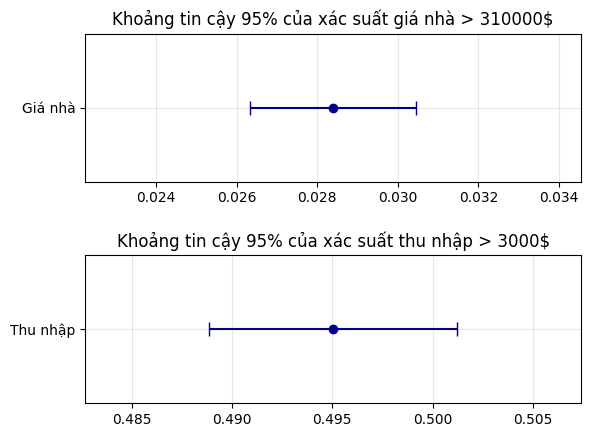

In [8]:
fig,ax = plt.subplots(2,1)

ax[0].errorbar(y=['Giá nhà'],
             x=[p_hat_house_value],
             xerr=[SE_house_value],
             fmt='o',capsize=5,color='darkblue')
ax[0].margins(1)
ax[0].grid(alpha=0.3)
ax[0].set_title(f'Khoảng tin cậy 95% của xác suất giá nhà > 310000$')

plt.subplots_adjust(hspace=0.5)
ax[1].errorbar(y=['Thu nhập'],
             x=[p_hat_income],
             xerr=[SE_income],
             fmt='o',capsize=5,color='darkblue')
ax[1].margins(0.5)
ax[1].grid(alpha=0.3)
ax[1].set_title(f'Khoảng tin cậy 95% của xác suất thu nhập > 3000$')

Tiếp theo ta sẽ tính:
+ $\hat{P}$ của giá nhà lớn hơn 310000 của những căn nhà ven biển
+ $\hat{P}$ của thu nhập hơn 3000 của những chủ nhà ven biển


In [9]:
x=Data_near_ocean[Data_near_ocean['median_house_value']>310000].shape[0]
n=Data_near_ocean['median_house_value'].shape[0]

p_hat_house_value = x/n

In [10]:
x=Data_near_ocean[Data_near_ocean['median_income']*1000>3000].shape[0]
n=Data_near_ocean['median_income'].shape[0]

p_hat_income = x/n

In [11]:
SE_house_value = math.sqrt((p_hat_house_value * (1-p_hat_house_value))/n)

lower_nearocean_house_value_CI = p_hat_house_value - Z_alpha2*SE_house_value
upper_nearocean_house_value_CI = p_hat_house_value + Z_alpha2*SE_house_value

print(f"Khoảng tin cậy cho xác suất có giá nhà > 310000$ là ({lower_nearocean_house_value_CI:.3f},{upper_nearocean_house_value_CI:.3f})")


Khoảng tin cậy cho xác suất có giá nhà > 310000$ là (0.255,0.289)


In [12]:
SE_income = math.sqrt((p_hat_income * (1-p_hat_income))/n)

lower_nearocean_income_CI = p_hat_income - Z_alpha2*SE_income
upper_nearocean_income_CI = p_hat_income + Z_alpha2*SE_income

print(f"Khoảng tin cậy cho xác suất có giá nhà > 310000$ là ({lower_nearocean_income_CI:.3f},{upper_nearocean_income_CI:.3f})")


Khoảng tin cậy cho xác suất có giá nhà > 310000$ là (0.650,0.686)


Trực quan hóa khoảng tin cậy

Text(0.5, 1.0, 'Khoảng tin cậy 95% của xác suất thu nhập > 3000$')

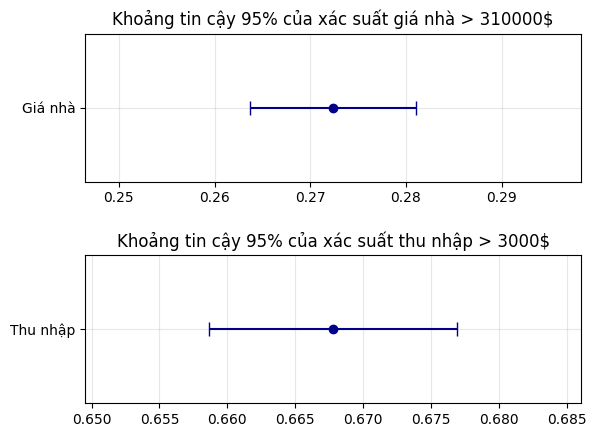

In [13]:
fig,ax = plt.subplots(2,1)

ax[0].errorbar(y=['Giá nhà'],
             x=[p_hat_house_value],
             xerr=[SE_house_value],
             fmt='o',capsize=5,color='darkblue')
ax[0].margins(1)
ax[0].grid(alpha=0.3)
ax[0].set_title(f'Khoảng tin cậy 95% của xác suất giá nhà > 310000$')

plt.subplots_adjust(hspace=0.5)
ax[1].errorbar(y=['Thu nhập'],
             x=[p_hat_income],
             xerr=[SE_income],
             fmt='o',capsize=5,color='darkblue')
ax[1].margins(0.5)
ax[1].grid(alpha=0.3)
ax[1].set_title(f'Khoảng tin cậy 95% của xác suất thu nhập > 3000$')